In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [18]:
def preprocess_data(path,type):
    data_type = []
    c = []
    faces = []
    mean = []
    min = []
    var = []
    max = []
    with open(path,'r') as f:
        for line in f:
            l = line.split(',')
            faces.append(l[0])
            data_type.append(l[1])
            c.append(l[2])
            l[-1] = l[-1].strip('\n')
            arr = np.array(l[3:],dtype=float)

            min.append(np.min(arr))
            max.append(np.max(arr))
            var.append(np.var(arr))
            mean.append(np.mean(arr))
        
    data_list = []
    for i in range(0,len(faces),4):
        record = {}
        record['Subject ID'] = faces[i]
        record['class'] = c[i]

        record['mean_diastolic_rate'] = mean[i]
        record['min_diastolic_rate'] = min[i]
        record['max_diastolic_rate'] = max[i]
        record['variance_diastolic_rate'] = var[i]

        record['mean_eda'] = mean[i+1]
        record['min_eda'] = min[i+1]
        record['max_eda'] = max[i+1]
        record['variance_eda'] = var[i+1]

        record['mean_systolic_rate'] = mean[i+2]
        record['min_systolic_rate'] = min[i+2]
        record['max_systolic_rate'] = max[i+2]
        record['variance_systolic_rate'] = var[i+2]

        record['mean_respiration'] = mean[i+3]
        record['min_respiration'] = min[i+3]
        record['max_respiration'] = max[i+3]
        record['variance_respiration'] = var[i+3]
        data_list.append(record)
        
    df = pd.DataFrame(data_list)
    selected_columns = ['Subject ID','class']
    if(type=='all'):
        return df
    elif(type =='dia'):
        selected_columns.extend(['mean_diastolic_rate','min_diastolic_rate','max_diastolic_rate','variance_diastolic_rate'])
    elif(type == 'sys'):
        selected_columns.extend(['mean_systolic_rate','min_systolic_rate','max_systolic_rate','variance_systolic_rate'])
    elif(type=='eda'):
        selected_columns.extend(['mean_eda','min_eda','max_eda','variance_eda'])
    elif(type=='res'):
        selected_columns.extend(['mean_respiration','min_respiration','max_respiration','variance_respiration'])
    else:
        raise ValueError("Incorrect Type Provided. There are only 5 data types - dia, sys, eda, res, all.")
    df = df[selected_columns]
    return df


In [25]:
def plots(data,type):
    label = {'dia':'Diastolic BP','sys': 'Systolic BP','eda': 'EDA' ,'res': 'Respiration','all':'Fusion of all data types'}
    sns.boxplot(data=data)
    plt.title('Variability of '+label[type])
    plt.xticks(rotation=90)
    plt.show()

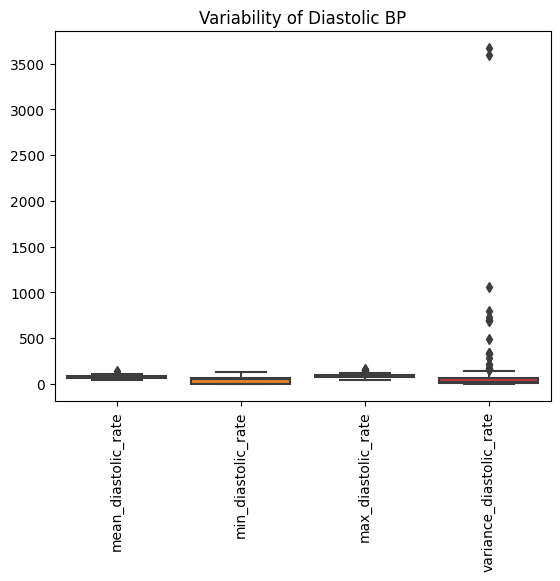

In [26]:
plots(preprocess_data('./Project2Data.csv','dia'),'dia')

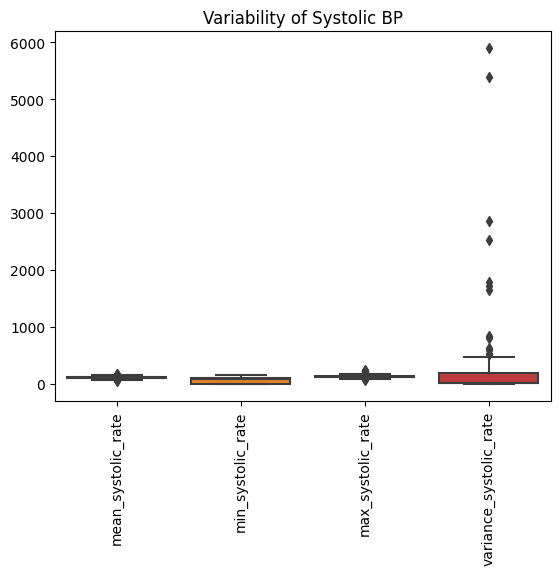

In [27]:
plots(preprocess_data('./Project2Data.csv','sys'),'sys')

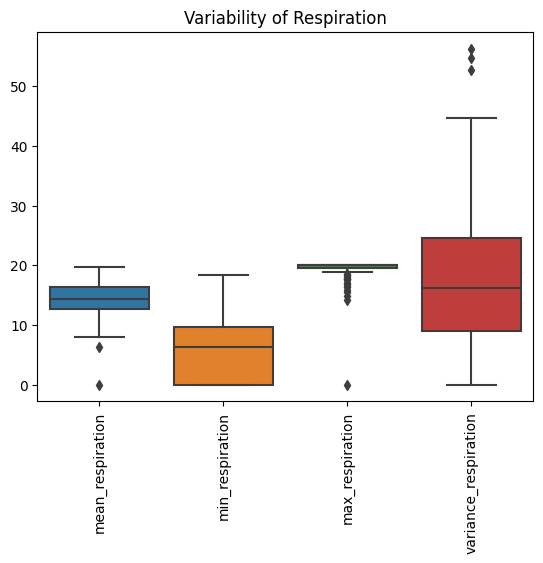

In [28]:
plots(preprocess_data('./Project2Data.csv','res'),'res')

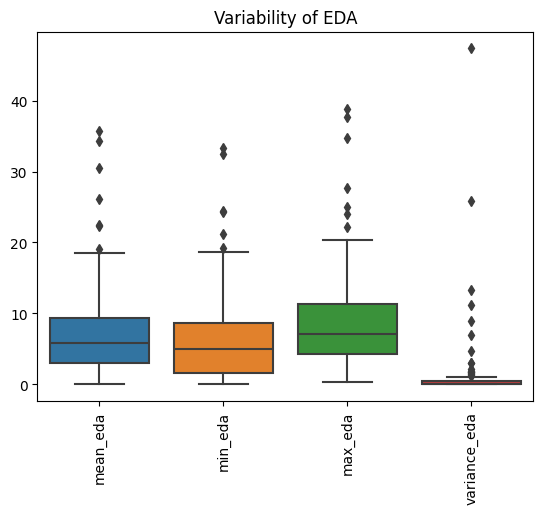

In [29]:
plots(preprocess_data('./Project2Data.csv','eda'),'eda')

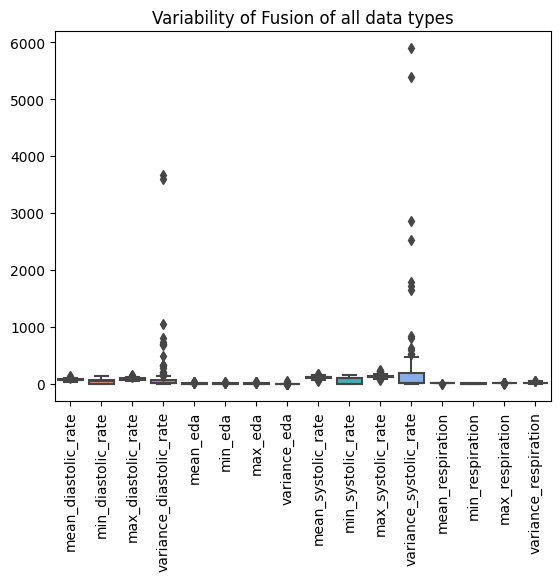

In [30]:
plots(preprocess_data('./Project2Data.csv','all'),'all')

In [9]:
values = []
data_type = []
with open('./Project2Data.csv','r') as f:
        for line in f:
            l = line.split(',')
            data_type.append(l[1])
            l[-1] = l[-1].strip('\n')
            arr = np.array(l[3:],dtype=float)
            values.append(arr)

In [8]:
def line_plot(data,type):
    label = {'dia':'Diastolic BP','sys': 'Systolic BP','eda': 'EDA' ,'res': 'Respiration','all':'Fusion of all data types'}
    plt.plot(data)
    plt.ylabel(label[type])
    plt.title('Line Graph of '+label[type])

    plt.show()

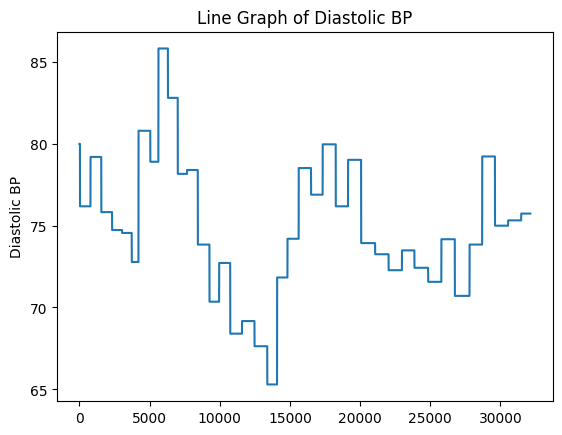

BP Dia_mmHg


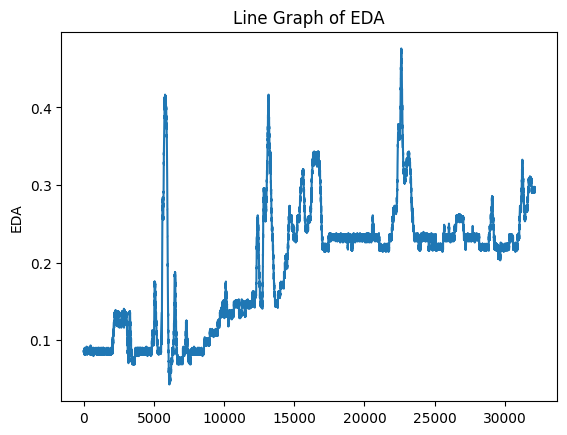

EDA_microsiemens


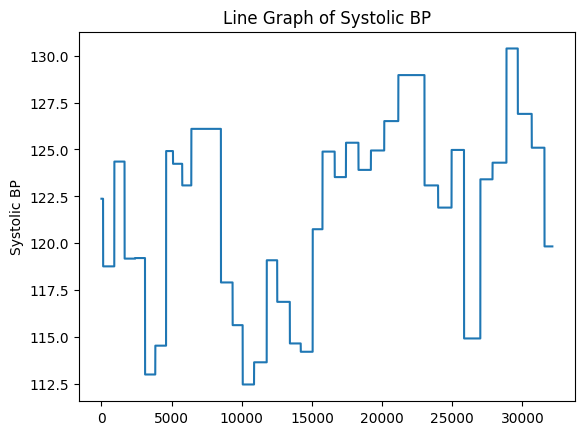

LA Systolic BP_mmHg


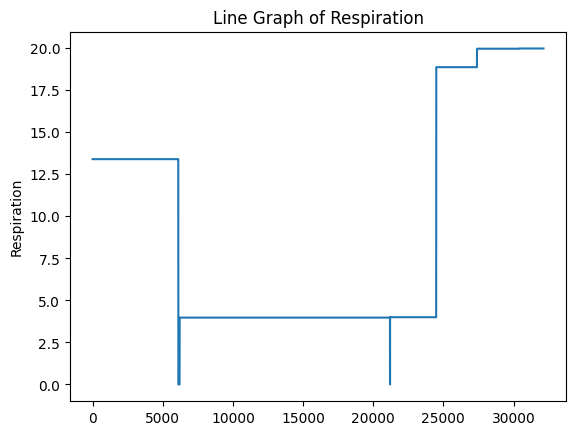

Respiration Rate_BPM


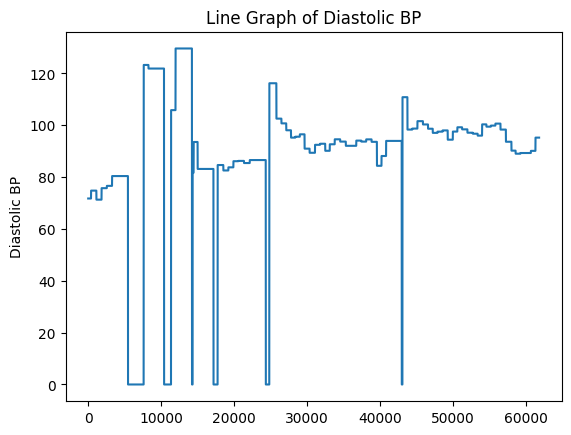

BP Dia_mmHg


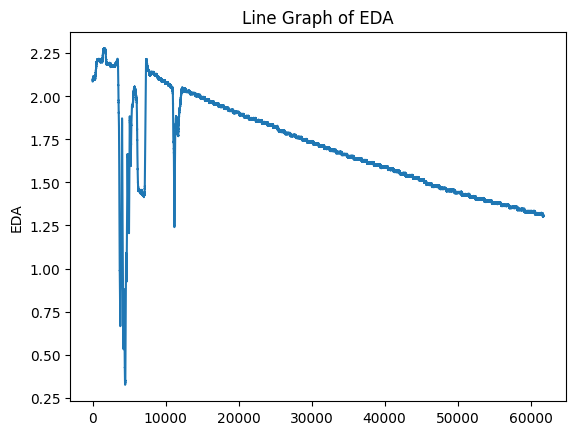

EDA_microsiemens


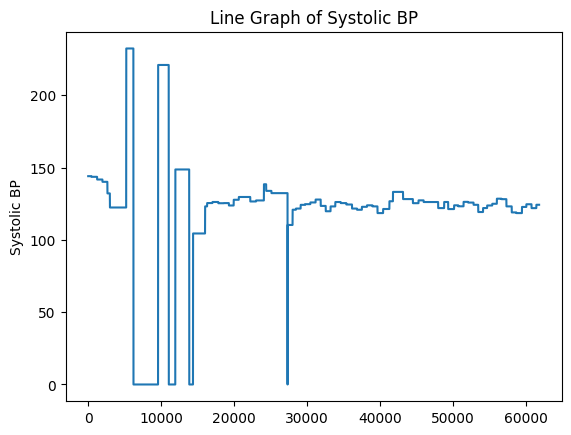

LA Systolic BP_mmHg


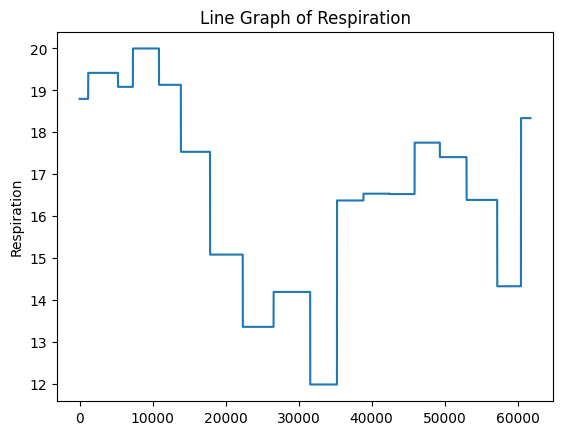

Respiration Rate_BPM


In [11]:
line_plot(values[160],'dia')
print(data_type[160])
line_plot(values[161],'eda')
print(data_type[161])
line_plot(values[162],'sys')
print(data_type[162])
line_plot(values[163],'res')
print(data_type[163])
line_plot(values[164],'dia')
print(data_type[164])
line_plot(values[165],'eda')
print(data_type[165])
line_plot(values[166],'sys')
print(data_type[166])
line_plot(values[167],'res')
print(data_type[167])

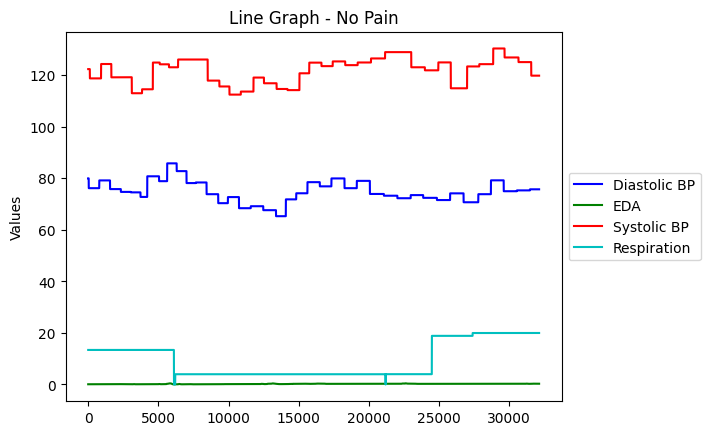

In [21]:
colors = ['b', 'g', 'r', 'c']  
label = {'dia':'Diastolic BP','sys': 'Systolic BP','eda': 'EDA' ,'res': 'Respiration','all':'Fusion of all data types'}

plt.plot(values[160], color=colors[0], label=label['dia']) 
plt.plot(values[161], color=colors[1], label=label['eda'])
plt.plot(values[162], color=colors[2], label=label['sys'])
plt.plot(values[163], color=colors[3], label=label['res'])

plt.ylabel('Values')
plt.title('Line Graph - No Pain')
legend_loc = (1.0, 0.5) 

plt.legend(loc='center left', bbox_to_anchor=legend_loc)
plt.show()

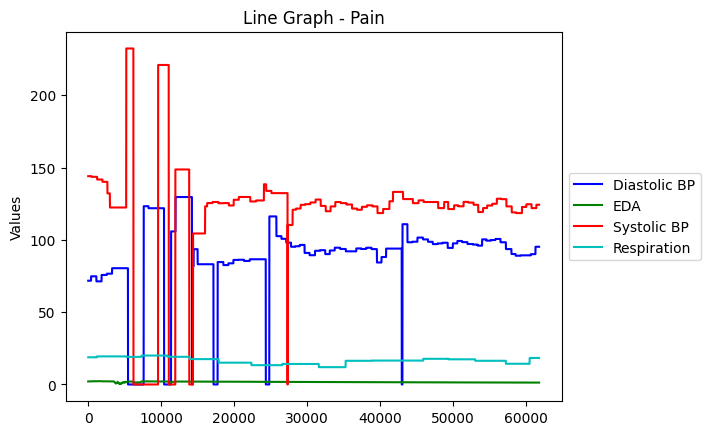

In [22]:
colors = ['b', 'g', 'r', 'c']  
label = {'dia':'Diastolic BP','sys': 'Systolic BP','eda': 'EDA' ,'res': 'Respiration','all':'Fusion of all data types'}

plt.plot(values[164], color=colors[0], label=label['dia']) 
plt.plot(values[165], color=colors[1], label=label['eda'])
plt.plot(values[166], color=colors[2], label=label['sys'])
plt.plot(values[167], color=colors[3], label=label['res'])

plt.ylabel('Values')
plt.title('Line Graph - Pain')
legend_loc = (1.0, 0.5) 

plt.legend(loc='center left', bbox_to_anchor=legend_loc)
plt.show()